In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [238]:
df = pd.read_csv('track.csv')
#df.drop(df.index[0], inplace = True)
df.columns=['No','Latitude','Longtitude','Height','1','2','3']
df = df.drop(["1", "2",'3'], axis=1)

In [239]:
df = df.iloc[:37]
df

,No,Latitude,Longtitude,Height
0,1,40.132935,64.998090,1375.0
1,2,40.126360,64.997780,1489.0
2,3,40.125904,NaN,1700.0
3,4,NaN,64.996185,1950.0
4,5,40.125530,64.995030,2174.0
5,6,40.125782,NaN,2396.0
6,7,40.118042,NaN,2660.0
7,8,40.124730,NaN,3647.0
8,9,40.124170,NaN,3196.0
9,10,40.123867,NaN,3387.0


In [240]:
data=df.dropna()
x=data['Latitude']
y=data['Longtitude']
x = x.astype(float)
y = y.astype(float)


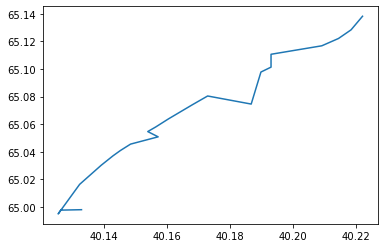

In [241]:
plt.plot(x, y)

In [242]:
test=df[df['Longtitude'].isna()]

In [243]:
test = test.dropna(subset=['Latitude'])

In [244]:
from sklearn.linear_model import LinearRegression
X_train, y_train = data.drop(['Longtitude'], axis = 1), data['Longtitude']
X_test, y_test = test.drop(['Longtitude'], axis = 1), data['Longtitude']
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
acc_linear_regression = round(regressor.score(X_train, y_train)*100, 3)
print(str(acc_linear_regression))

98.795


In [245]:
new_df=test.copy()
new_df['Longtitude']=Y_pred
new_df

,No,Latitude,Longtitude,Height
2,3,40.125904,64.994765,1700.0
5,6,40.125782,64.999747,2396.0
6,7,40.118042,64.994172,2660.0
7,8,40.124730,64.998719,3647.0
8,9,40.124170,65.002899,3196.0
9,10,40.123867,65.004498,3387.0
10,11,40.123700,65.006345,3550.0
11,12,40.124090,65.008591,3739.0
12,13,40.124893,65.010033,4198.0
13,14,40.712587,65.553514,4372.0


In [246]:
df_full= pd.concat([data, new_df])
df_full

,No,Latitude,Longtitude,Height
0,1,40.132935,64.998090,1375.0
1,2,40.126360,64.997780,1489.0
4,5,40.125530,64.995030,2174.0
15,16,40.132343,65.016450,4932.0
17,18,40.139187,65.030290,5418.0
18,19,40.142930,65.037120,5708.0
19,20,40.145280,65.040970,5907.0
20,21,40.148509,65.045616,6195.0
21,22,40.157258,65.050890,6473.0
22,23,40.153960,65.054700,6691.0


In [247]:
df_full=df_full.sort_values(['No'])
df_full

,No,Latitude,Longtitude,Height
0,1,40.132935,64.998090,1375.0
1,2,40.126360,64.997780,1489.0
2,3,40.125904,64.994765,1700.0
4,5,40.125530,64.995030,2174.0
5,6,40.125782,64.999747,2396.0
6,7,40.118042,64.994172,2660.0
7,8,40.124730,64.998719,3647.0
8,9,40.124170,65.002899,3196.0
9,10,40.123867,65.004498,3387.0
10,11,40.123700,65.006345,3550.0


In [248]:
df_full.drop(df_full.index[12], inplace = True)
df_full

,No,Latitude,Longtitude,Height
0,1,40.132935,64.998090,1375.0
1,2,40.126360,64.997780,1489.0
2,3,40.125904,64.994765,1700.0
4,5,40.125530,64.995030,2174.0
5,6,40.125782,64.999747,2396.0
6,7,40.118042,64.994172,2660.0
7,8,40.124730,64.998719,3647.0
8,9,40.124170,65.002899,3196.0
9,10,40.123867,65.004498,3387.0
10,11,40.123700,65.006345,3550.0


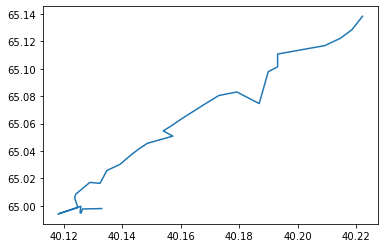

In [249]:
x_n=df_full['Latitude']
y_n=df_full['Longtitude']

plt.plot(x_n, y_n)

In [250]:
df_full.to_csv("Results.csv",index=False)